# KNN Example
## Import Dependencies

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from MulticoreTSNE import MulticoreTSNE as TSNE
np.random.seed(3100)

## Get Dataset and Preprocess

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
df = pd.read_csv(url, names=names)

In [20]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class,pca-one,pca-two
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.889820,-0.137346
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.746437,-0.311124
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.728593,0.333925


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
# Normalise the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Fit Model and Results

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=12) # Set initial K to the square root of the Number of Samples
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Effect of K Value on Predictions

In [10]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

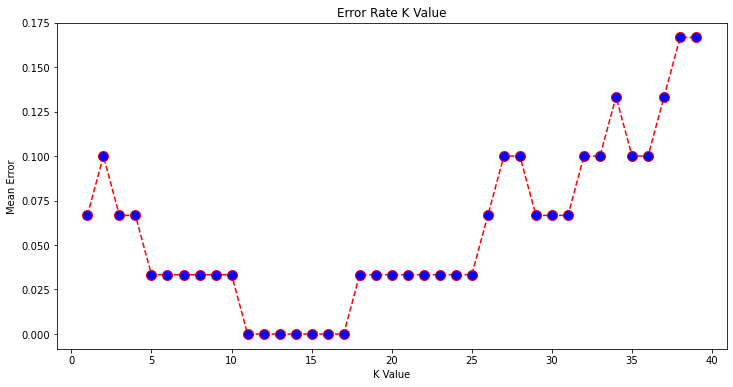

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Visualizing the Data

In [12]:
X_reduced = PCA(n_components=2).fit_transform(X)

In [14]:
df['pca-one'] = X_reduced [:,0]
df['pca-two'] = X_reduced [:,1] 

In [23]:
df[['pca-one', 'pca-two']]

,pca-one,pca-two
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

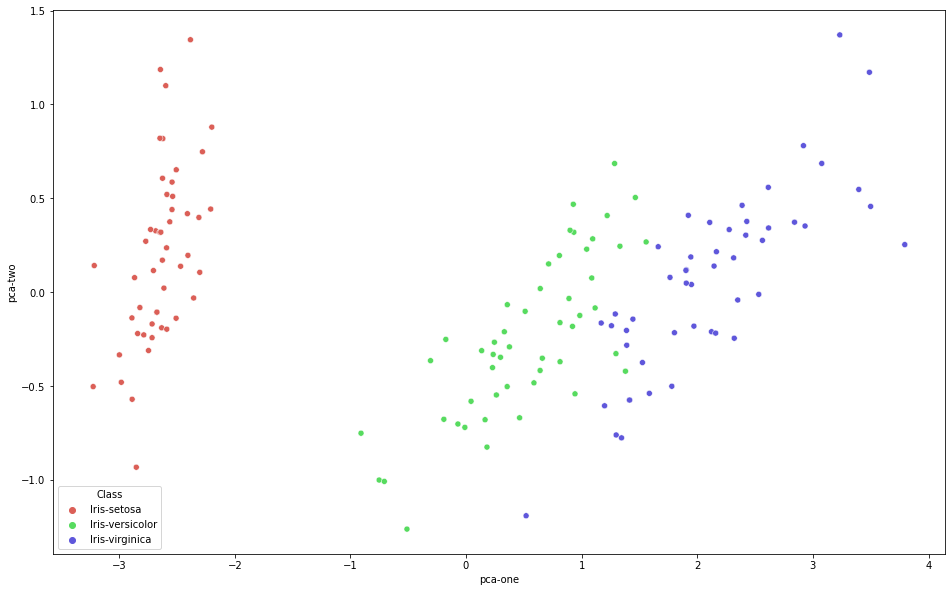

In [38]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Class",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=1
)

In [40]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, n_jobs=12)

In [44]:
tsne_results = tsne.fit_transform(X)
df['tsne-one'] = tsne_results [:,0]
df['tsne-two'] = tsne_results [:,1] 

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

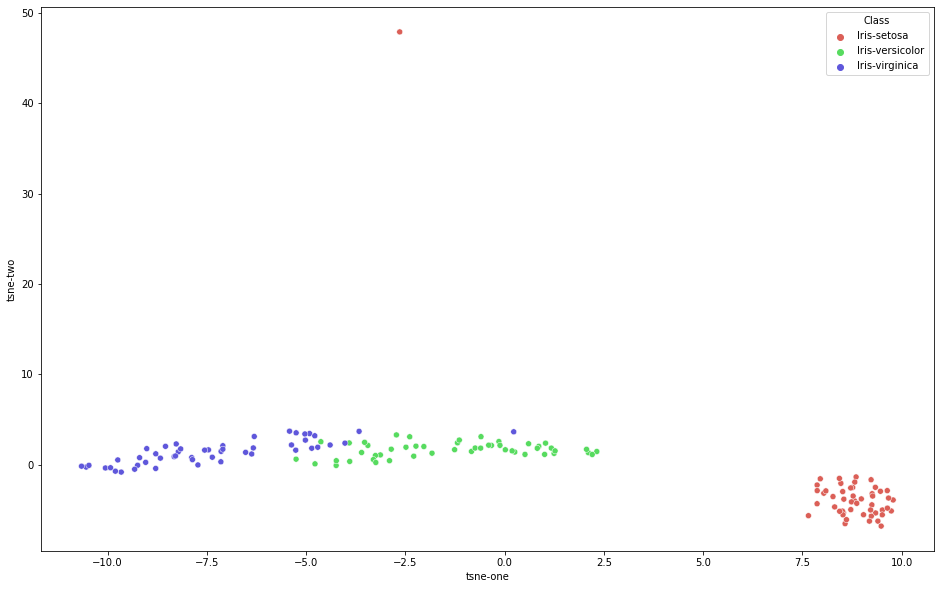

In [45]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="Class",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=1
)